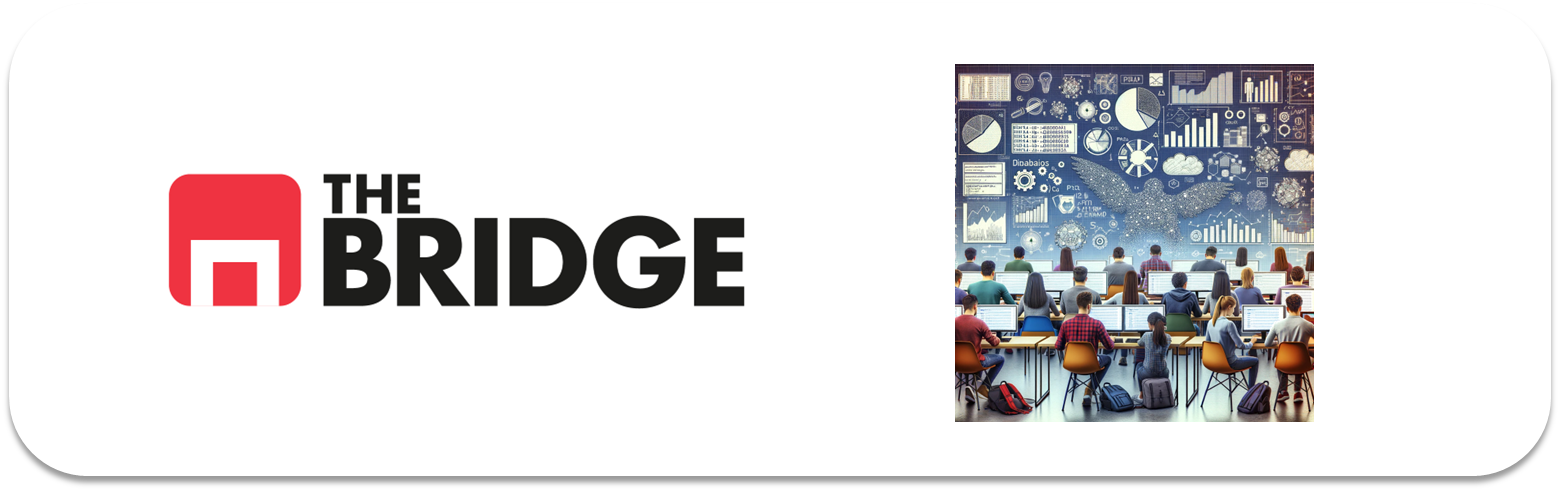

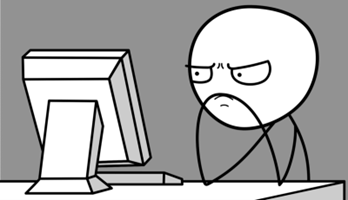

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np

### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [2]:
data = pd.read_csv('./data/advertising_ml.csv')

In [3]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35 years,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31 years,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26 years,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29 years,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35 años,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


In [5]:
data.describe()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,55000.000080,180.000100,0.481000,0.50000
std,15.853615,13414.634022,43.902339,0.499889,0.50025
min,32.600000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,65470.635000,218.792500,1.000000,1.00000
max,91.430000,79484.800000,269.960000,1.000000,1.00000


* No hay valores nulos en las variables
* La variable age, para usarla como una numérica, hay que eliminar la palabra "years"
* La variable Timestamp hay que transformarla a tipo datetime

### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

- Potencial variable target: Clicked on Ad, con valores 0 para no y 1 para si
- Problema de tipo categórico
- Aprendizaje supervisado porque contamos con un dataset con etiquetas

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

In [10]:
data.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
403,87.23,29 años,51015.11,202.12,Re-engineered responsive definition,Lake Kevin,0,American Samoa,2016-03-26 19:54:16,0
995,72.97,30 years,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
169,86.69,34 años,62238.58,198.56,Customer-focused attitude-oriented instruction...,South Jennifer,0,Chad,2016-05-27 06:19:27,0
529,89.37,34 años,42760.22,162.03,Compatible dedicated productivity,Port Stacey,1,Australia,2016-04-16 12:26:31,0
607,65.22,30 años,66263.37,240.09,Fully-configurable foreground solution,Michaelland,1,Falkland Islands (Malvinas),2016-05-07 15:16:07,0


In [7]:
def cardinalidad(df_in, umbral_categoria, umbral_continua):
    # Crear un dataframe con las estadísticas de cardinalidad
    df_variables = pd.DataFrame({
        "valores_unicos": df_in.nunique(),
        "cardinalidad(%)": round(df_in.nunique() / len(df_in) * 100, 2),
    })
    tipo =[]
    # recorrer los datos y clasificar en función de los valores unicos y cardinalidad
    for var in df_variables.index:
        valores_unicos = df_variables.loc[var,"valores_unicos"]
        cardinalidad = df_variables.loc[var,"cardinalidad(%)"]
        if valores_unicos == 2:
            tipo.append("Binaria")
        elif valores_unicos < umbral_categoria:
            tipo.append("Categorica")
        elif cardinalidad >= umbral_continua:
            tipo.append("Numérica continua")
        else:
            tipo.append("Numérica discreta")

    df_variables["tipo"] = tipo   
    return df_variables

In [8]:
cardinalidad(data,10,30)

,valores_unicos,cardinalidad(%),tipo
Daily Time Spent on Site,900,90.0,Numérica continua
Age,83,8.3,Numérica discreta
Area Income,1000,100.0,Numérica continua
Daily Internet Usage,966,96.6,Numérica continua
Ad Topic Line,1000,100.0,Numérica continua
City,969,96.9,Numérica continua
Male,2,0.2,Binaria
Country,237,23.7,Numérica discreta
Timestamp,1000,100.0,Numérica continua
Clicked on Ad,2,0.2,Binaria


|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Daily Time Spent on Site|Tiempo diario en la página web (en ming)|Numérica continua||||
|Age|Edad del usuario de la web|Numérica discreta||||
|Area Income	|Ingresos anuales del área|Númerica continua||||
|Daily Internet Usage	|Tiempo diario de uso de internet (en min)|Numérica continua||||
|Ad Topic Line|Frase relacionada con el producto del anuncio|String||||
|City	|Ciudad|String||||
|Male	|Identifica si el usuario es hombre o no|Categórica binaria||||
|Country	|País|Categórica (string)||||
|Timestamp	|Fecha y hora de acceso a internet|Fecha||||
|Clicked on Ad	|Indica si pinchó en el anuncio|Categória binaria||||

### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [14]:
data['age_num'] = data['Age'].str.extract(r'(\d+)').astype(int)
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [15]:
data.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,age_num
978,71.40,30 years,72188.90,166.31,Integrated 3rdgeneration monitoring,Beckton,0,Japan,2016-05-24 17:07:08,0,30
991,38.96,38 años,36497.22,140.67,Versatile mission-critical application,Mauricefurt,1,Comoros,2016-07-21 16:02:40,1,38
855,50.87,24 años,62939.50,190.41,Programmable empowering orchestration,North Angelatown,0,Liberia,2016-05-10 17:13:47,1,24
836,49.21,46 years,49206.40,115.60,Realigned 24/7 core,Carterland,0,Mexico,2016-02-28 03:34:35,1,46
307,82.70,35 years,61383.79,231.07,Visionary multi-tasking alliance,Amyfurt,0,Somalia,2016-01-09 15:49:28,0,35


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   object        
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  age_num                   1000 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(4)
memory usage: 82.2+

### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

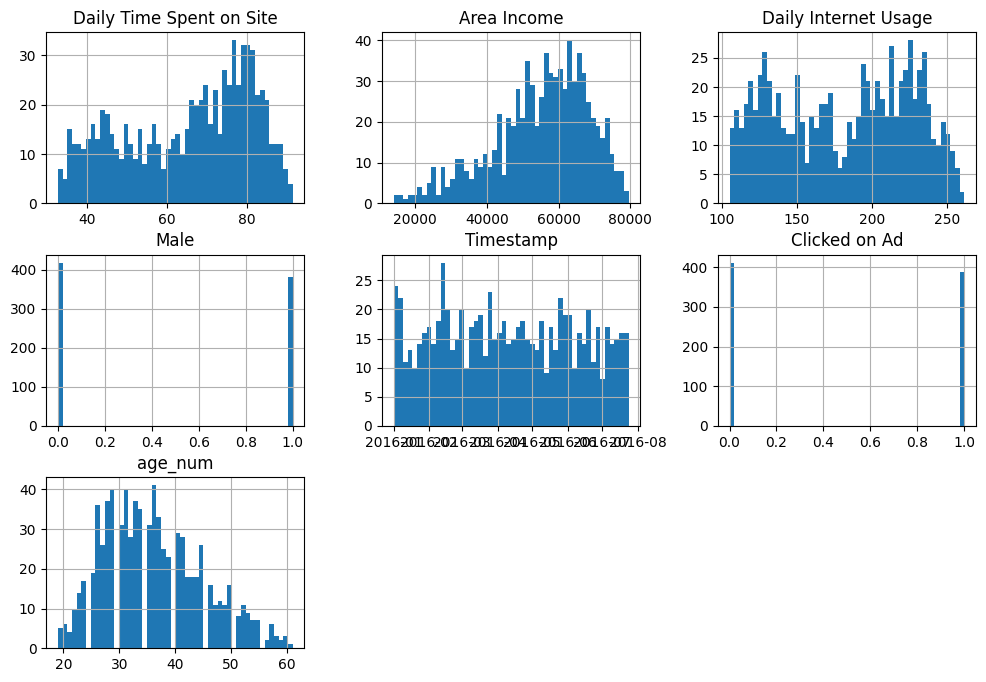

In [19]:
train_set.hist(bins=50, figsize=(12, 8)); # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset

### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

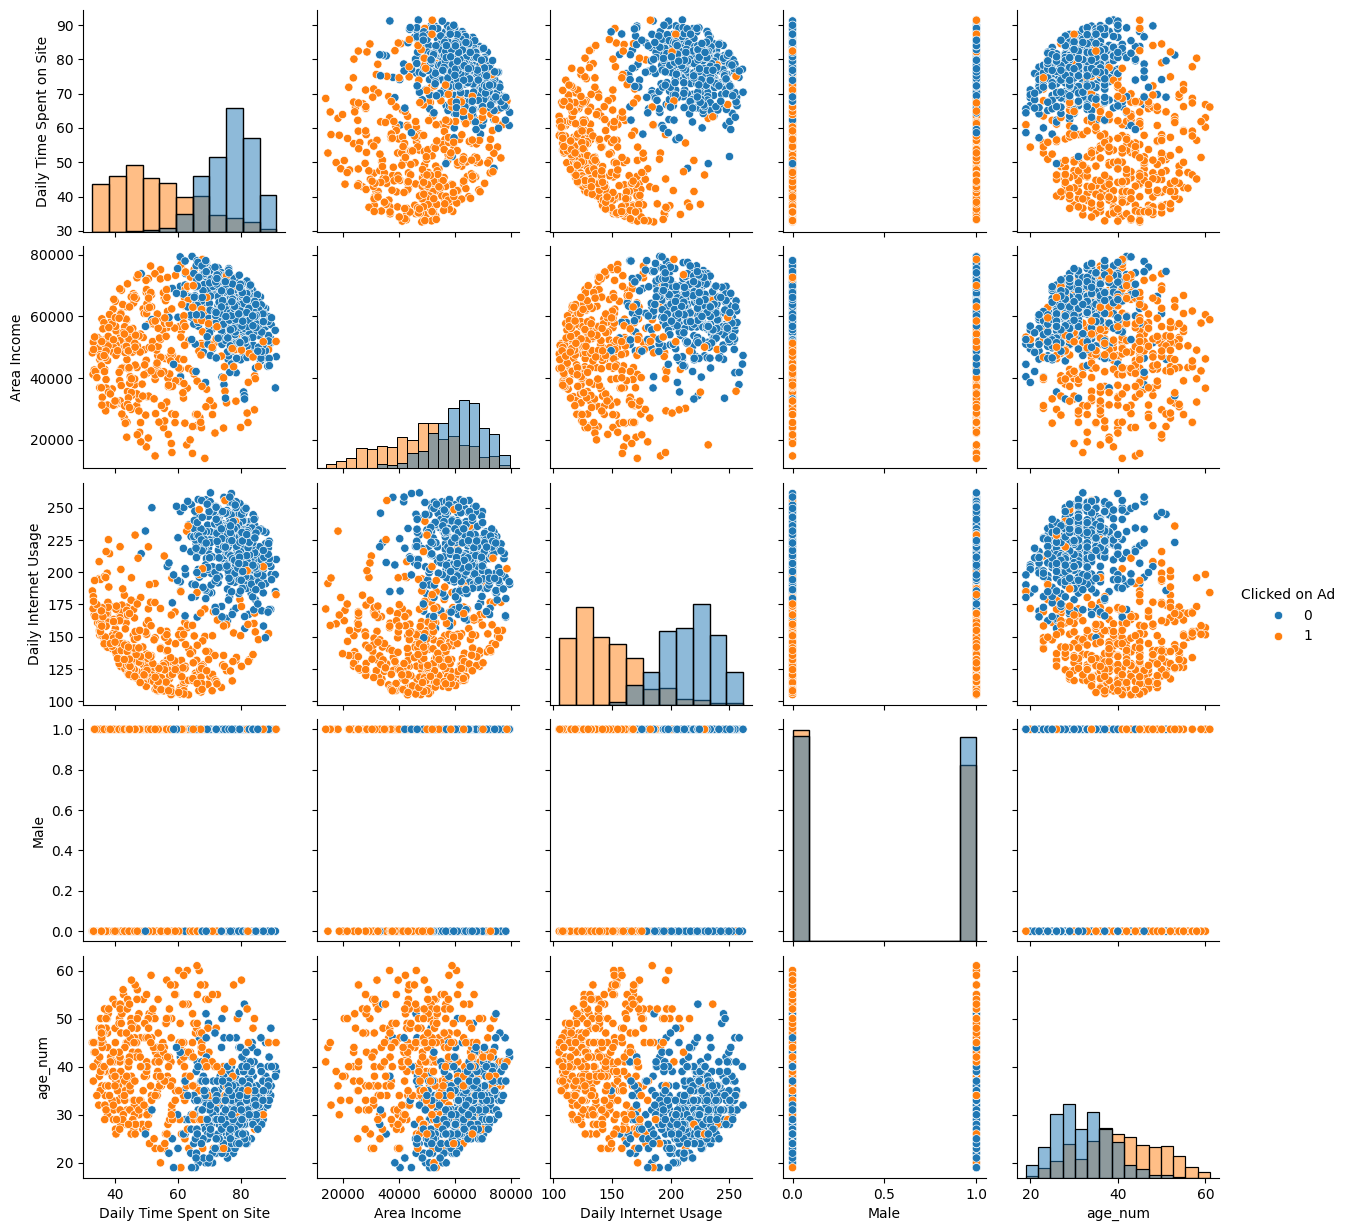

In [22]:
import seaborn as sns

sns.pairplot(train_set, hue="Clicked on Ad", diag_kind='hist');

### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features:

Features: Variables con menor solapamiento entre las clases de la variable target
* Daily Time Spent on Site
* Daily Internet Usage
